In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA (Data Exploratory Analisis)

#### En este documento abordaré la información contenida en dos hojas del dataset "Homicidios.xlsx". En cuestión, las páginas "Hechos" y "Victimas".

In [3]:
# Primero voy a importar las hojas del dataset y los guardo en unos nuevos.

excel = pd.ExcelFile('./Datasets/homicidios.xlsx')

hojas = excel.sheet_names

hec = hojas[0]
vic = hojas[2]

hechos = pd.read_excel('./Datasets/homicidios.xlsx', sheet_name=hec)
victimas = pd.read_excel('./Datasets/homicidios.xlsx', sheet_name=vic)

In [74]:
hechos.to_csv('./Datasets/Hechos.csv', index=False)
victimas.to_csv('./Datasets/Victimas.csv', index=False)

##
# HECHOS

#### En este dataset encontraremos información de los diferentes hechos delictivos cometidos en la ciudad.

In [75]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

## Valores Nulos

#### Las siguientes columnas son las que poseen valores faltantes.

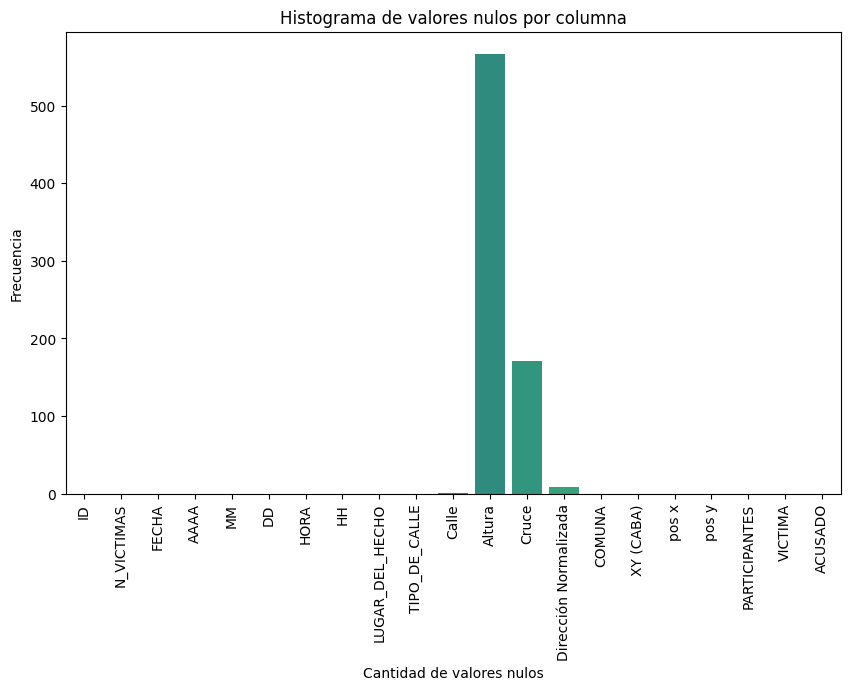

Nulos en Calle: 1 
Nulos en Altura: 567 
Nulos en Cruce: 171 
Nulos en Dirección normalizada: 8


In [4]:
columnas = list(hechos.columns)
# Calculo la cantidad de valores nulos en cada columna
nulos_por_columna = hechos.isnull().sum()

# Crear un histograma con matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=columnas, y=nulos_por_columna, hue=columnas, palette='viridis', legend=False)
plt.title('Histograma de valores nulos por columna')
plt.xlabel('Cantidad de valores nulos')
plt.xticks(rotation=90)  
plt.ylabel('Frecuencia')
plt.show()

nullCalle = hechos['Calle'].isnull().sum()
nullAltura = hechos['Altura'].isnull().sum()
nullCruce = hechos['Cruce'].isnull().sum()
nullDir = hechos['Dirección Normalizada'].isnull().sum()

print(f'Nulos en Calle: {nullCalle} \nNulos en Altura: {nullAltura} \nNulos en Cruce: {nullCruce} \nNulos en Dirección normalizada: {nullDir}')

##
#### Faltan varios de los datos del único nulo de la columna Calle. Por lo que voy a proceder a elminar la fila entera.

In [124]:
nullCalle = hechos[hechos['Calle'].isnull()]
nullCalle

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [4]:
hechos = hechos.drop(119)

##
#### Siempre que haya valores nulos en la columna 'Dirección Normalizada' es porque el hecho se desarrolló en una Autopista, la cual figura en la columna 'LUGAR_DEL_HECHO'

In [126]:
nullDir = hechos[hechos['Dirección Normalizada'].isnull()]
nullDir

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


##
#### Puedo relacionar los nulos de la columna Altura por varias razones:

A. El hecho se desarrolló en una Autopista.

B. El hecho se registró por el cruce de las calles y no se registró la altura.

C. El hecho se registró por la altura de la calle y no se rellenó la columna 'Altura' (En este caso podemos encontrar la información en la columna 'Dirección Normalizada').

D. Registro mal realizado en esa fila.

In [138]:
nullAltura = hechos[hechos['Altura'].isnull()]
nullAltura.sample(6)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
184,2017-0054,1,2017-05-07,2017,5,7,21:00:00,21,AV. DE LOS CONSTITUYENTES Y PEDRO MORAN,AVENIDA,...,NaN,"MORAN, PEDRO","DE LOS CONSTITUYENTES AV. y MORAN, PEDRO",15,Point (97843.76024114 104700.29820723),-58.48680218,-34.58689719,MOTO-AUTO,MOTO,AUTO
393,2018-0119,1,2018-11-05,2018,11,5,22:35:00,22,Rabanal y San Pedrito,AVENIDA,...,NaN,SAN PEDRITO,"RABANAL, FRANCISCO, INTENDENTE AV. y SAN PEDRITO",8,Point (102489.86457298 96266.15892101),-58.43613623,-34.66292532,PEATON-SD,PEATON,SD
48,2016-0068,1,2016-05-22,2016,5,22,22:00:00,22,AV FIGUEROA ALCORTA Y AV PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,"FIGUEROA ALCORTA, PRES. AV. y PUEYRREDON AV.",2,Point (106673.12856878 104998.99234220),-58.39056593,-34.58418569,MOTO-PASAJEROS,MOTO,PASAJEROS
366,2018-0092,1,2018-08-20,2018,8,20,08:20:00,8,Cordoba Av. y Gascon,AVENIDA,...,NaN,GASCON,CORDOBA AV. y GASCON,14,Point (103662.91363929 103496.49206019),-58.42336930,-34.59774487,MOTO-AUTO,MOTO,AUTO
207,2017-0082,1,2017-06-25,2017,6,25,22:40:00,22,AV. ENTRE RIOS Y AV. BRASIL,AVENIDA,...,NaN,BRASIL,ENTRE RIOS AV. y BRASIL,4,Point (106636.30041967 99991.34072603),-58.39092851,-34.62932696,PEATON-AUTO,PEATON,AUTO
99,2016-0128,1,2016-10-02,2016,10,2,11:30:00,11,CASTRO Y AV PAVON,AVENIDA,...,NaN,PAVON AV.,CASTRO y PAVON AV.,5,Point (104049.28528337 99858.37522846),-58.41914024,-34.63053890,PEATON-PASAJEROS,PEATON,PASAJEROS


##
#### Así mismo, cuando en la columna Cruce aparece un valor puede ser por varias razones:

A. El hecho se registró con la altura de la calle y no por el cruce.

B. EL hecho se registró por el cruce de las calles pero no se rellenó la columna 'Cruce' (En este caso podemos encontrar la información en la columna 'Dirección Normalizada').

C. Registro mal realizado en esa fila.

In [128]:
nullCruce = hechos[hechos['Cruce'].isnull()]
nullCruce

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


## Valores Duplicados

#### A. No se encuentran IDs duplicados en el dataset.
###
#### B. Tampoco hay registros que coincidan en una misma Fecha, Hora, Calle y Altura.

In [141]:
# Busco IDs duplicados.
duplicados = hechos['ID'].duplicated()

filas_duplicadas = hechos[duplicados]
filas_duplicadas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [143]:
# Busco siniestros con la misma Fecha, Hora, Calle y Altura
dup_filas_fecha_hora = hechos[['FECHA', 'HORA', 'Calle', 'Altura']].duplicated()
filas_duplicadas_fecha_hora = hechos[dup_filas_fecha_hora]

filas_duplicadas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


### Análisis de Victimas / Acusados
###
#### Comparación de vehículos
* Los siniestros de Transporte de pasajeros hacia Peatones son los de mayor repetición.
* El auto es el vehículo que más figura en la columna Acusados.
* La moto es el vehículo que más figura en la columna Victima.

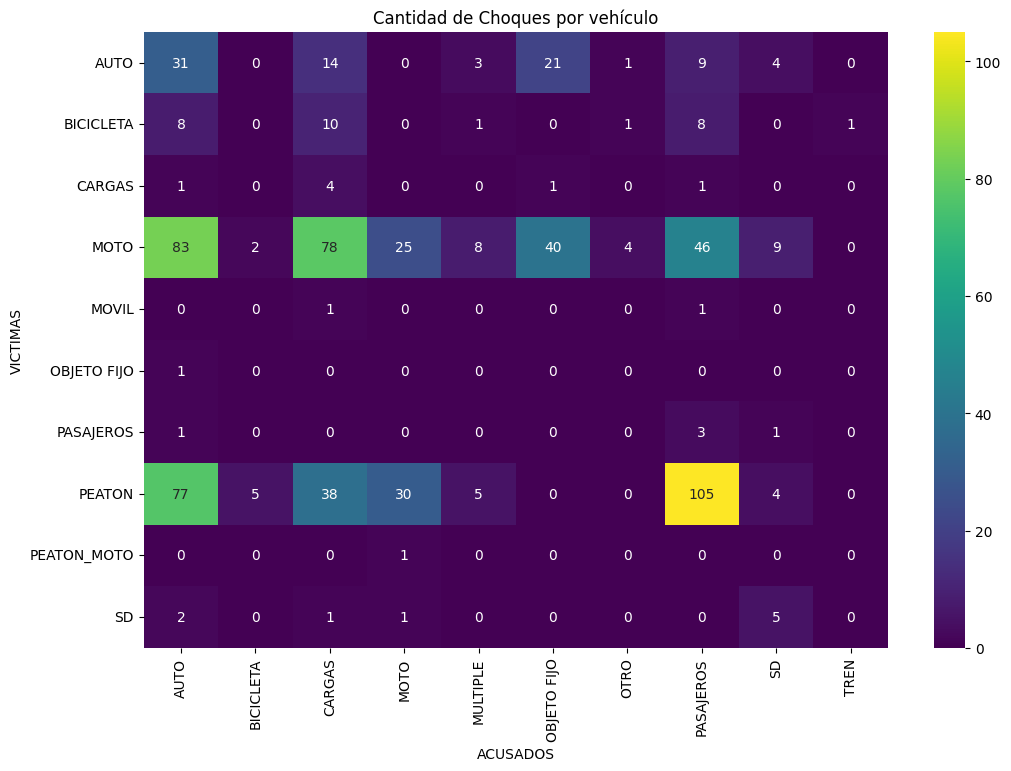

In [3]:
vehiculos_victima = hechos['VICTIMA'].dropna()
vehiculos_acusado = hechos['ACUSADO'].dropna()

# Crear un DataFrame con la cantidad de choques entre vehículos
df_frecuencia = pd.crosstab(vehiculos_victima, vehiculos_acusado)

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('Cantidad de Choques por vehículo')
plt.xlabel('ACUSADOS')
plt.ylabel('VICTIMAS')
plt.show()

### Análisis por Comuna

> **Aclaración:** Hay un registro que figura como 'Comuna 0'. Esta muestra un siniestro ocurrido en una autopista, pero al tener varios datos faltantes no podemos tomar a este registro cómo confiable.

### Siniestros por Comuna
###
#### A. Comunas con mayor índice. 

* La comuna 1 es la más concurrida de la ciudad, siendo esta el centro financiero, turístico y sede de importantes edificios a nivel nacional y ciudad.

* Al ser una comuna muy concurrida por muchas razones, es la de mayores probabilidades de que esta siga siendo así.

* a comuna 4 posee las avenidas Coronel Roca y Coronel Francisco Ravanal así cómo la avenida Perito Moreno, éstas al ser las arterias que comunican a la comuna con otros barrios de la ciudad pueden ser centro de siniestros viales gracias a la cantidad de vehículos que circulan a diario. Un análisis similar puede ser aplicado a la comuna 9.
###
#### B. Comunas con menor índice

* La comuna con menor registro de siniestros es la comuna 6 seguido de cerca por la comuna 5.

* La comuna 6 (cuyo barrio es Caballito) se destaca por ser una zona residencial y con gran catidad de espacios verdes.

* Es un barrio que cuenta con diversas vías de transporte que ayudan a recorrer el mismo barrio como los demás de la ciudad: Amplias avenidas, el ferrocarril Sarmiento y el puente para automóviles, sin mencionar las líneas A y E del subte.

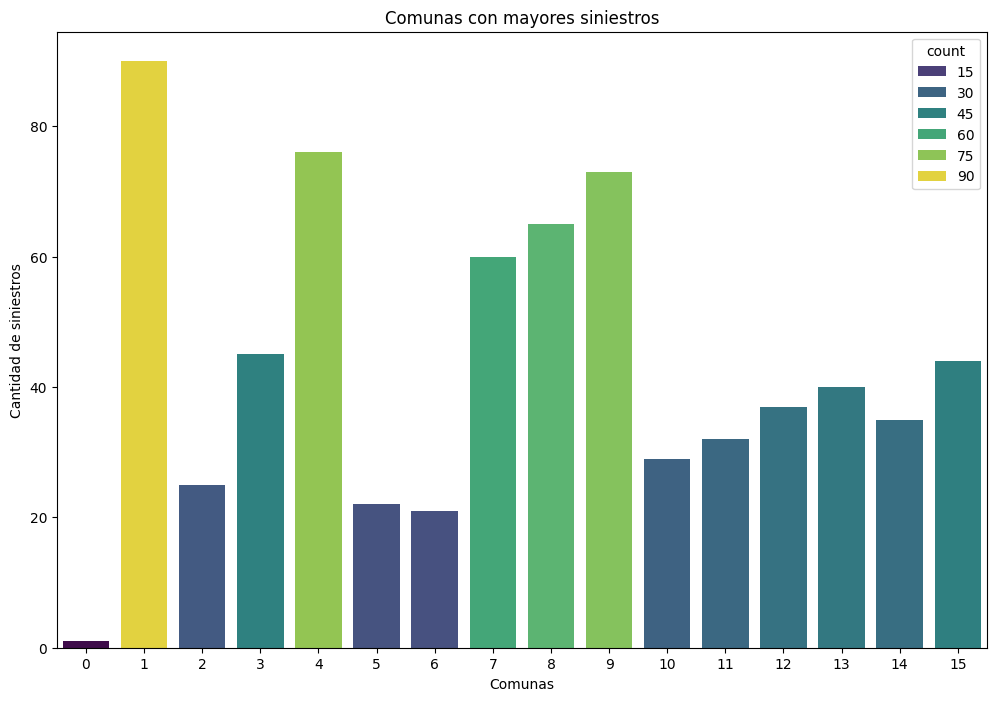

In [28]:
# Contar la frecuencia de siniestros por comuna
frecuencia_comunas = hechos['COMUNA'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=frecuencia_comunas.index, y=frecuencia_comunas.values, hue=frecuencia_comunas, palette='viridis')
plt.title('Comunas con mayores siniestros')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de siniestros')
plt.show()

### Victimas y Acusados por Comuna
###
* Las comunas 1 y 4 son las más peligrosas hacia el peatón.

* Las comunas 1, 4 y 9 son las más peligrosas para las motos.

* Las comunas 8 y 9 tienen valores más altos de lo normal de autos.
#
* En la comuna 1, el vehiculo con mayor tendencia a siniestros son los transporte de pasajeros.

* En la comuna 4, el vehiculo con mayor tendencia a siniestros son los transporte de cargas, seguido de cerca por el de pasajeros.

* En la comuna 7, el vehiculo con mayor tendencia a siniestros son los autos.

* En la comuna 9, el vehiculo con mayor tendencia a siniestros son los autos seguido por los transporte de cargas.

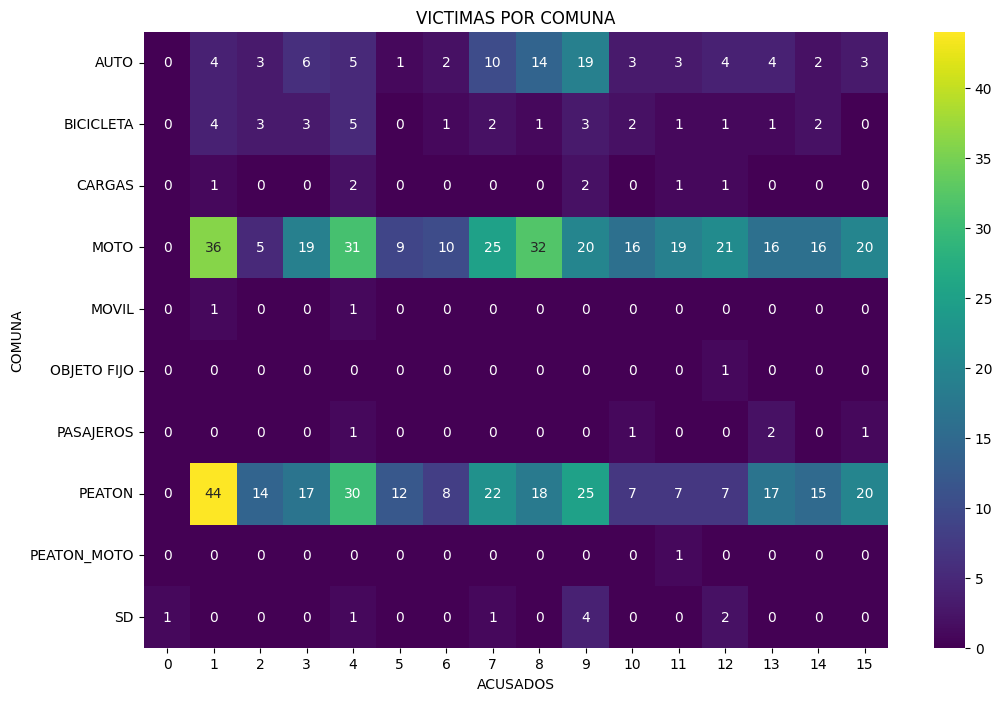

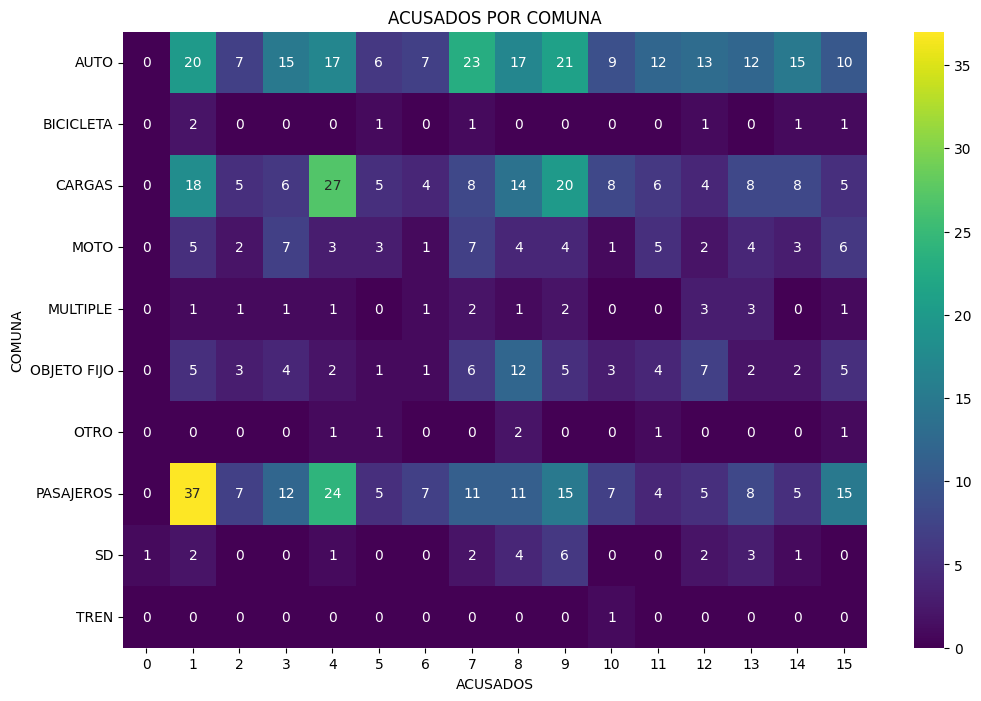

In [27]:
vehiculos_victima = hechos['VICTIMA'].dropna()
comuna = hechos['COMUNA'].dropna()

# Crear un DataFrame con la cantidad de choques entre vehículos
df_frecuencia = pd.crosstab(vehiculos_victima, comuna)

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('VICTIMAS POR COMUNA')
plt.xlabel('ACUSADOS')
plt.ylabel('COMUNA')
plt.show()

comuna = hechos['COMUNA'].dropna()
vehiculos_acusado = hechos['ACUSADO'].dropna()

# Crear un DataFrame con la cantidad de choques entre vehículos
df_frecuencia = pd.crosstab(vehiculos_acusado, comuna)

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('ACUSADOS POR COMUNA')
plt.xlabel('ACUSADOS')
plt.ylabel('COMUNA')
plt.show()

### Comuna por año
###
#### A. Se puede ver que los indices de siniestro baja con respecto al paso de los años.

* Esto se debe a la continua implementación de mejoras de la ciudad.

#### B. Desde el año 2019 se bajó drásticamente el número de siniestros en varias de las comunas que contaban con más números de ellos.

* En ese año se reforzaron los controles y la creación de infraestructura vial de manera específica a las necesidades de cada vehículo.

#### C. En 2021 la comuna 4 sobrepasó a la comuna 1.

* La mayoría de esos siniestros ocurrieron en avenidas.

* Ese año se llevaron a cabo modificaciones en distintas avenidas, lo que suele llevar a provocar mayor uso de otros caminos. Pero a finales del año decayó bastante el índice de siniestros.

* Este hecho se puede considerar un **Outlier**, ya que no será común que este hecho siga siendo así en posteriores años.

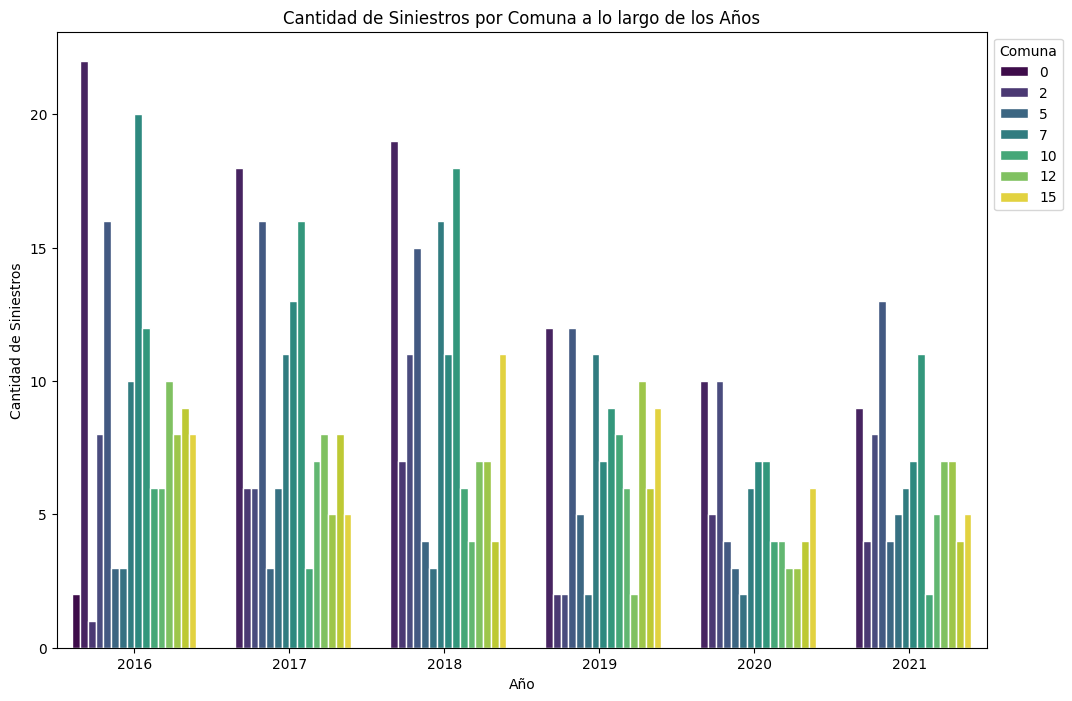

In [6]:
siniestros = hechos.groupby(['AAAA', 'COMUNA']).size().reset_index(name='CANTIDAD_SINIESTROS')

plt.figure(figsize=(12, 8))
sns.barplot(x='AAAA', y='CANTIDAD_SINIESTROS', data=siniestros, hue='COMUNA', palette='viridis', edgecolor='white')
plt.title('Cantidad de Siniestros por Comuna a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.legend(title='Comuna', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Análisis por Tipo de Calle

#### A. La mayoría de accidentes se provocan en Avenidas.

* Si bien en la comuna 1 se provocan la mayoría de siniestros, la comuna 4 y 7 no se quedan atrás.

* Se nota que bajó el índice de siniestros en 2019, cómo anteriormente se había expuesto, pero no lo suficiente y en 2021 volvió a subir.

#### B. En la Gral. Paz se produjeron mayores siniestros en la comuna 12.

* 

#### C. La Gral. Paz y la Autopista tienen igual cantidad de siniestros en total.
* En los últimos años se muestra que los valores van en subida.

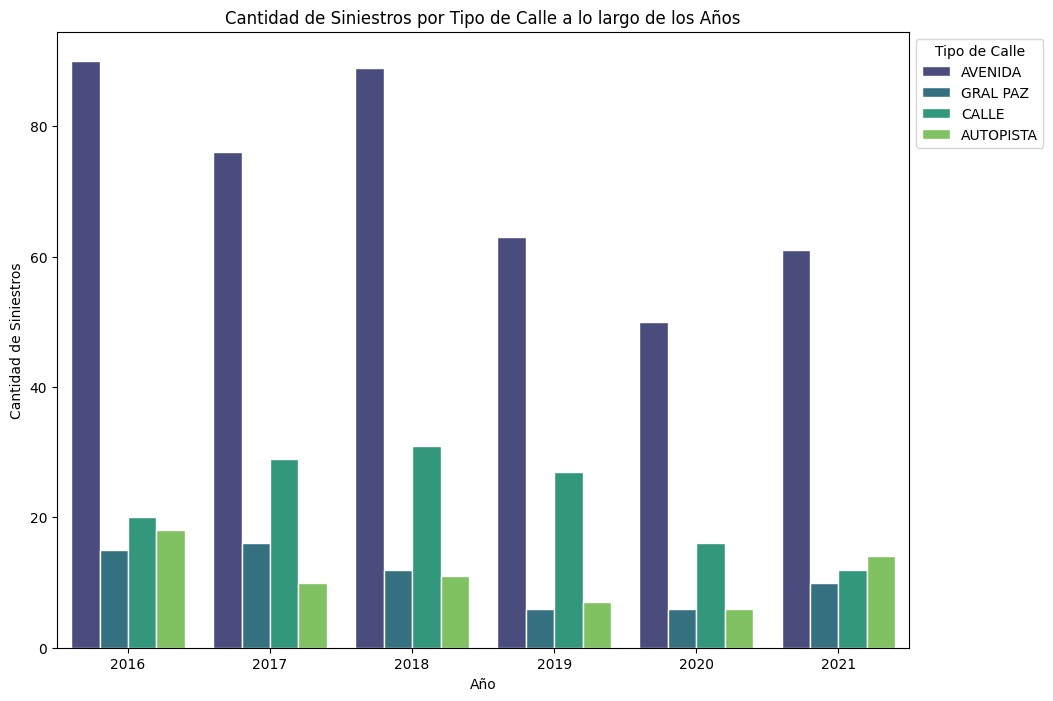

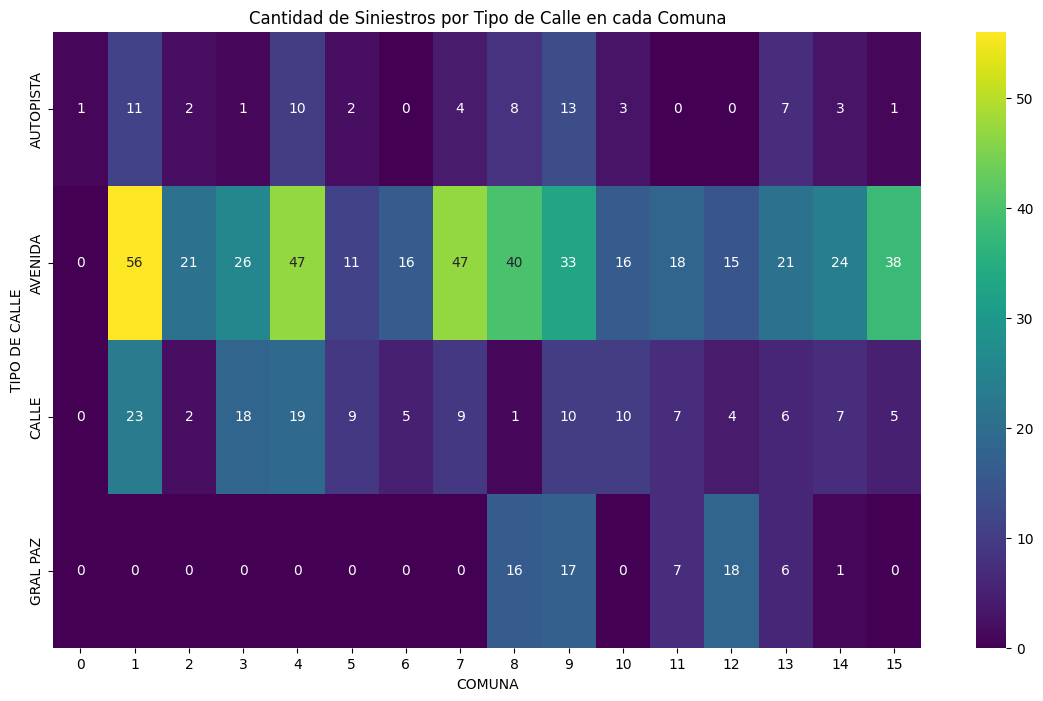

In [35]:
plt.figure(figsize=(11, 8))
sns.countplot(x='AAAA', hue='TIPO_DE_CALLE', data=hechos, palette='viridis', edgecolor='white')

plt.title('Cantidad de Siniestros por Tipo de Calle a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.legend(title='Tipo de Calle', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

df_frecuencia = pd.crosstab(hechos['TIPO_DE_CALLE'],hechos['COMUNA'])

plt.figure(figsize=(14, 8))
sns.heatmap(df_frecuencia, annot=True, cmap='viridis', fmt='d')
plt.title('Cantidad de Siniestros por Tipo de Calle en cada Comuna')
plt.xlabel('COMUNA')
plt.ylabel('TIPO DE CALLE')
plt.show()

### CONCLUSIONES

#### Fuentes:

Comuna 1:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_01.pdf

Comuna 4:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_04.pdf

Comuna 9:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_09.pdf

Comuna 6:

    http://ssplan.buenosaires.gob.ar/dmdocuments/comuna_06.pdf

Baja de los siniestros en 2019:

    https://buenosaires.gob.ar/noticias/en-2019-bajaron-30-las-victimas-fatales-en-siniestros-viales 

Comuna 4 en 2021: \n

    https://buenosaires.gob.ar/noticias/obras-de-seguridad-vial-en-el-centro-de-trasbordo-saenz 
